<a href="https://colab.research.google.com/github/YusufAbdurrahmann/taxi-trip-price-regression/blob/main/taxi_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# **Data Import**

In [2]:
df = pd.read_csv("sample_data/taxi_trip_pricing.csv")
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


# **Data Understanding**

In [3]:
df.shape

(1000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


# **Data Cleaning**

In [5]:
df.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [7]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

# **Explanatory Data Analysis (EDA)**

<ipython-input-17-f542234e42b7>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = "Time_of_Day", palette = "pastel")


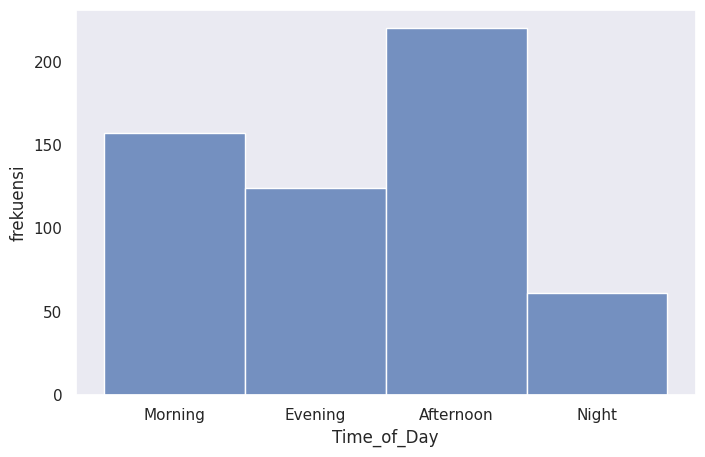

In [17]:
plt.figure(figsize = (8,5))
sns.set_theme(style = "dark")
sns.histplot(data = df, x = "Time_of_Day", palette = "pastel")
plt.ylabel("frekuensi")
plt.show()

<ipython-input-19-faeb54201f6e>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = "Day_of_Week", palette = "pastel")


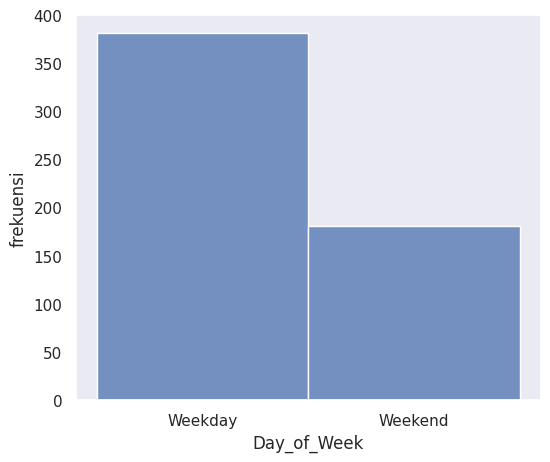

In [19]:
plt.figure(figsize = (6,5))
sns.set_theme(style = "dark")
sns.histplot(data = df, x = "Day_of_Week", palette = "pastel")
plt.ylabel("frekuensi")
plt.show()

<ipython-input-29-ce9095a432fc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Trip_Price"], color = "skyblue")


<Axes: xlabel='Trip_Price', ylabel='Density'>

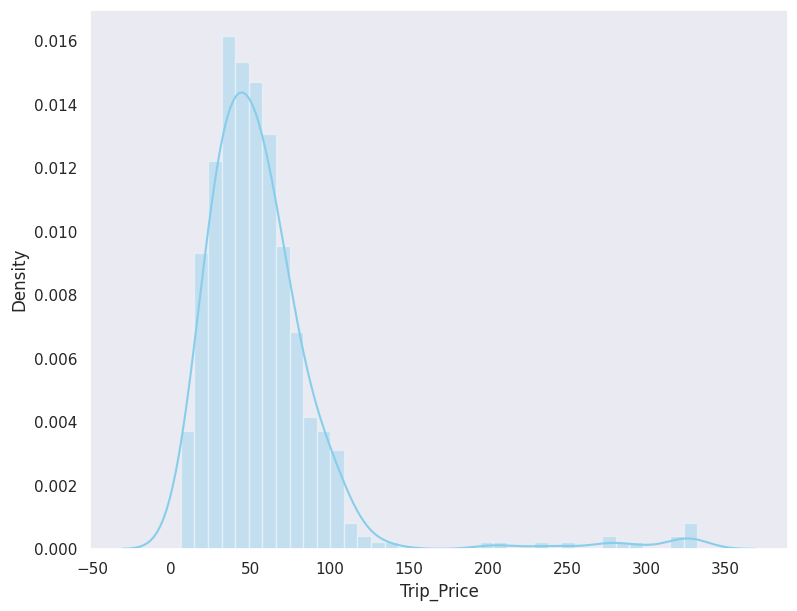

In [29]:
plt.figure(figsize = (9,7))
sns.distplot(df["Trip_Price"], color = "skyblue")

<Axes: >

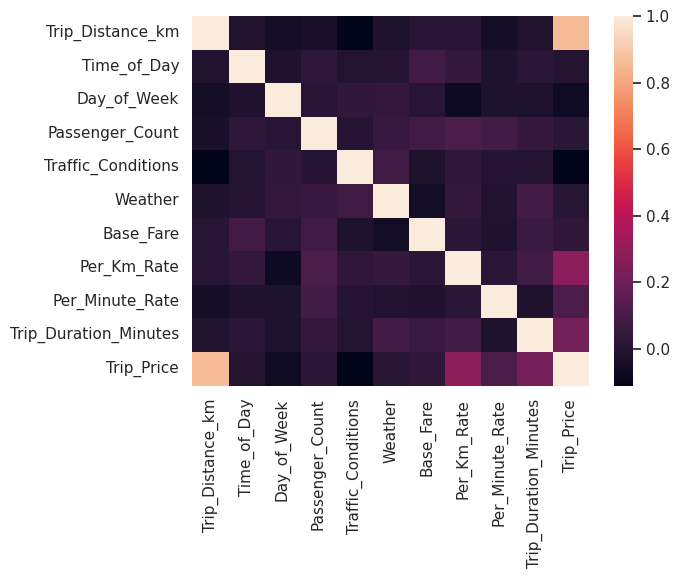

In [30]:
sns.heatmap(df.corr())

# **Data Preperation**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       562 non-null    float64
 1   Time_of_Day            562 non-null    object 
 2   Day_of_Week            562 non-null    object 
 3   Passenger_Count        562 non-null    float64
 4   Traffic_Conditions     562 non-null    object 
 5   Weather                562 non-null    object 
 6   Base_Fare              562 non-null    float64
 7   Per_Km_Rate            562 non-null    float64
 8   Per_Minute_Rate        562 non-null    float64
 9   Trip_Duration_Minutes  562 non-null    float64
 10  Trip_Price             562 non-null    float64
dtypes: float64(7), object(4)
memory usage: 52.7+ KB


In [22]:
tod = LabelEncoder()
dow = LabelEncoder()
tcs = LabelEncoder()
wtr = LabelEncoder()

df["Time_of_Day"] = tod.fit_transform(df["Time_of_Day"])
df["Day_of_Week"] = dow.fit_transform(df["Day_of_Week"])
df["Traffic_Conditions"] = tod.fit_transform(df["Traffic_Conditions"])
df["Weather"] = tod.fit_transform(df["Weather"])

In [35]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [34]:
X = df.drop(columns = ["Trip_Price"])
y = df["Trip_Price"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Modelling**

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
score = lr.score(X_test, y_test)

print(score)
print("Accuracy : {:.2f}%".format(score*100))

0.8833749733929421
Accuracy : 88.34%
